# Student Performance

Jade Chen 22411268

![Student Performance](https://github.com/jadeeechen/STAT-301-Project-2023W1-/blob/main/studentperformance.jpg?raw=true)
Source: Youtube - Ma. Israelle S. Lopez

## PART I - DATA AND QUESTIONS

### Description

The data includes two datasets about student performance. The data is taken from two Portuguese secondary schools and collected through school reports and questionnaires. One dataset is about “Mathematics” and the other is about “Portuguese Language”.

For our project, we are only using the dataset on “Mathematics”.

### Source

The original dataset was taken from the following link:
https://archive.ics.uci.edu/dataset/320/student+performance

The dataset is read in from the following link (personal GitHub):
https://raw.githubusercontent.com/jadeeechen/STAT-301-Project-2023W1-/main/student-mat.csv

### Research Question
<span style="color:red"> (Predict) Can family background and study habits predict a students' final grade in Mathematics?</span>

1. Response Variable (Dependent Variable)
    - `G3` (Final Grade)

2. Explanatory Variables (Independent Variables)
    - Family Background: `Internet` (Internet Access at Home)
    - Study Habits: `StudyTime` (Weekly Study Time)
    
* Note: There are multiple variables that can be used for both family background and study habits, here, it has been narrowed down to one variable each.

### Importing Packages

In [1]:
library(tidyverse)
library(GGally)
library(patchwork)
library(corrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded



### Read Data
Read in data from the web, split by delimiter `;` to have one feature per column, and show the first 3 observations.

In [2]:
url = 'https://raw.githubusercontent.com/jadeeechen/STAT-301-Project-2023W1-/main/student-mat.csv'
data <- read_csv(url) |>
    separate_wider_delim(cols = 'school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3',
                         delim = ";",
                         names = c('School', 'Sex', 'Age', 'Address', 'FamilySize', 'PStatus', 'MEdu', 'FEdu', 'MJob', 'FJob', 'Reason', 'Guardian', 'TravelTime', 'StudyTime', 'Failures', 'SchoolSupport', 'FamSupport', 'Paid', 'Activities', 'Nursery', 'Higher', 'Internet', 'Romantic', 'FamRel', 'FreeTime', 'GoOut', 'DAlch', 'WAlch', 'Health', 'Absences', 'G1', 'G2', 'G3')
                        )
head(data, 3)

Rows: 395 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;g...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


School Sex Age Address FamilySize PStatus MEdu FEdu MJob    FJob    ⋯ FamRel
1 GP     F   18  U       GT3        A       4    4    at_home teacher ⋯ 4     
2 GP     F   17  U       GT3        T       1    1    at_home other   ⋯ 5     
3 GP     F   15  U       LE3        T       1    1    at_home other   ⋯ 4     
  FreeTime GoOut DAlch WAlch Health Absences G1 G2 G3
1 3        4     1     1     3      6        5  6  6 
2 3        3     1     1     3      4        5  5  6 
3 3        2     2     3     3      10       7  8  10

### Drop Features

Since we are only interested in the final grade `G3`, we shall drop the first and second period grades `G1` and `G2`. As seen below, only `G3` remains in `data`.

As noted in the dataset source:
> Important Note: The target attribute `G3` has a strong correlation with attributes `G2` and `G1`. This occurs because `G3` is the final year grade (issued at the 3rd period), while `G1` and `G2` correspond to the 1st and 2nd period grades. It is more difficult to predict `G3` without `G1` and `G2`, but such prediction is much more useful (see paper source for more details).

In [3]:
data <- data |>
    select(-G1, -G2)
head(data, 3)

School Sex Age Address FamilySize PStatus MEdu FEdu MJob    FJob    ⋯
1 GP     F   18  U       GT3        A       4    4    at_home teacher ⋯
2 GP     F   17  U       GT3        T       1    1    at_home other   ⋯
3 GP     F   15  U       LE3        T       1    1    at_home other   ⋯
  Internet Romantic FamRel FreeTime GoOut DAlch WAlch Health Absences G3
1 no       no       4      3        4     1     1     3      6        6 
2 yes      no       5      3        3     1     1     3      4        6 
3 yes      no       4      3        2     2     3     3      10       10

### Number of Observations
With the `unique()` function, possible duplicate values present in data frame were eliminated. We can see that there are 395 unique observations. 

In [4]:
nrow(unique(data))

[1] 395

### Data Wrangling
For ease of the following descriptions, the relevant features were converted to numeric/factor type according to the "Additional Variable Information" from the dataset source.

In [5]:
#Binary -> Factor Type
data$School <- as.factor(data$School)
data$Sex <- as.factor(data$Sex)
data$Address <- as.factor(data$Address)
data$FamilySize <- as.factor(data$FamilySize)
data$PStatus <- as.factor(data$PStatus)
data$SchoolSupport <- as.factor(data$SchoolSupport)
data$FamSupport <- as.factor(data$FamSupport)
data$Paid <- as.factor(data$Paid)
data$Activities <- as.factor(data$Activities)
data$Nursery <- as.factor(data$Nursery)
data$Higher <- as.factor(data$Higher)
data$Internet <- as.factor(data$Internet)
data$Romantic <- as.factor(data$Romantic)

#Nominal -> Factor Type
data$MJob <- as.factor(data$MJob)
data$FJob <- as.factor(data$FJob)
data$Reason <- as.factor(data$Reason)
data$Guardian <- as.factor(data$Guardian)

#Numeric -> Numeric Type
data$Age <- as.numeric(data$Age)
data$MEdu <- as.numeric(data$MEdu)
data$FEdu <- as.numeric(data$FEdu)
data$TravelTime <- as.numeric(data$TravelTime)
data$StudyTime <- as.numeric(data$StudyTime)
data$Failures <- as.numeric(data$Failures)
data$FamRel <- as.numeric(data$FamRel)
data$FreeTime <- as.numeric(data$FreeTime)
data$GoOut <- as.numeric(data$GoOut)
data$DAlch <- as.numeric(data$DAlch)
data$WAlch <- as.numeric(data$WAlch)
data$Health <- as.numeric(data$Health)
data$Absences <- as.numeric(data$Absences)
data$G3 <- as.numeric(data$G3)

### Tidy Format

We can see from the table below that our dataframe is now in a tidy format.

1. **Each variable forms a column**: Each column represents a specific variable.
    - For example, `School` `Sex` `Age`, etc.<br><br>

2. **Each observation forms a row**: Each row in represents a unique observation.
    - For example, the first row represents one student's information, the second row represents another student's information, etc.<br><br>

3. **Each value is stored in a cell**: Each value of a variable is stored in a cell of the table, and the values do not contain units.
    - For example, in the first row, the value `F` in the `Sex` column represents the gender of the student.<br><br>

3. **Everything forms into a table**: All of this information is organized within a single table, making it a comprehensive and structured dataset.

In [6]:
head(data, 3)

School Sex Age Address FamilySize PStatus MEdu FEdu MJob    FJob    ⋯
1 GP     F   18  U       GT3        A       4    4    at_home teacher ⋯
2 GP     F   17  U       GT3        T       1    1    at_home other   ⋯
3 GP     F   15  U       LE3        T       1    1    at_home other   ⋯
  Internet Romantic FamRel FreeTime GoOut DAlch WAlch Health Absences G3
1 no       no       4      3        4     1     1     3       6        6
2 yes      no       5      3        3     1     1     3       4        6
3 yes      no       4      3        2     2     3     3      10       10

### Feature Information
In total, there are 33 features. The following dataframe shows the name, the number of unique values, and the type of each feature.

In [7]:
num_unique <- lapply(data, function(x) length(unique(x)))
column_types <- lapply(data, function(x) class(x))

result_df <- data.frame(
    NumUnique = unlist(num_unique),
    DataType = unlist(column_types)
)
result_df

NumUnique DataType
School         2        factor  
Sex            2        factor  
Age            8        numeric 
Address        2        factor  
FamilySize     2        factor  
PStatus        2        factor  
MEdu           5        numeric 
FEdu           5        numeric 
MJob           5        factor  
FJob           5        factor  
Reason         4        factor  
Guardian       3        factor  
TravelTime     4        numeric 
StudyTime      4        numeric 
Failures       4        numeric 
SchoolSupport  2        factor  
FamSupport     2        factor  
Paid           2        factor  
Activities     2        factor  
Nursery        2        factor  
Higher         2        factor  
Internet       2        factor  
Romantic       2        factor  
FamRel         5        numeric 
FreeTime       5        numeric 
GoOut          5        numeric 
DAlch          5        numeric 
WAlch          5        numeric 
Health         5        numeric 
Absences      34        numeric 
G3            18        numeric

### Unique Values of Factor Features
Furthermore, we can see the possible unique values of each factor feature.

In [8]:
data_factor <- select_if(data, is.factor)
ulst <- lapply(data_factor, function(x) unique(as.character(x)))
ulst

$School
[1] "GP" "MS"

$Sex
[1] "F" "M"

$Address
[1] "U" "R"

$FamilySize
[1] "GT3" "LE3"

$PStatus
[1] "A" "T"

$MJob
[1] "at_home"  "health"   "other"    "services" "teacher" 

$FJob
[1] "teacher"  "other"    "services" "health"   "at_home" 

$Reason
[1] "course"     "other"      "home"       "reputation"

$Guardian
[1] "mother" "father" "other" 

$SchoolSupport
[1] "yes" "no" 

$FamSupport
[1] "no"  "yes"

$Paid
[1] "no"  "yes"

$Activities
[1] "no"  "yes"

$Nursery
[1] "yes" "no" 

$Higher
[1] "yes" "no" 

$Internet
[1] "no"  "yes"

$Romantic
[1] "no"  "yes"

### Range of Numeric Features
For numeric features, we can further see the range of each feature.

In [9]:
# Subset numeric columns
data_numeric <- select_if(data, is.numeric)
data.frame(Min = sapply(data_numeric,min),
           Max = sapply(data_numeric,max))

Min Max
Age        15  22 
MEdu        0   4 
FEdu        0   4 
TravelTime  1   4 
StudyTime   1   4 
Failures    0   3 
FamRel      1   5 
FreeTime    1   5 
GoOut       1   5 
DAlch       1   5 
WAlch       1   5 
Health      1   5 
Absences    0  75 
G3          0  20

### Feature Details
Finally, we have the detailed description for possible values of each 33 features.

1. `School`: Student's School
    - GP - Gabriel Pereira
    - MS - Mousinho da Silveira
2. `Sex`: Student's Sex
    - F - female
    - M - male
3. `Age`: Student's Age
    - from 15 to 22
4. `Address`: Student's Home Address Type
    - U - urban
    - R - rural
5. `FamilySize`: Family Size
    - LE3 - less or equal to 3
    - GT3 - greater than 3
6. `Pstatus`: Parent's Cohabitation Status
    - T - living together
    - A - apart
7. `MEdu`: Mother's Education
    - 0 - none
    - 1 - primary education (4th grade)
    - 2 – 5th to 9th grade
    - 3 – secondary education
    - 4 – higher education
8. `FEdu`: Father's Education
    - 0 - none
    - 1 - primary education (4th grade)
    - 2 – 5th to 9th grade
    - 3 – secondary education
    - 4 – higher education
9. `MJob`: Mother's Job
    - teacher
    - health - health care related
    - services - civil services (e.g. administrative or police)
    - at_home
    - other
10. `FJob`: Father's Job
    - teacher
    - health - health care related
    - services - civil services (e.g. administrative or police)
    - at_home
    - other
11. `Reason`: Reason to Choose This School
    - home - close to home
    - reputation - school reputation
    - course - course preference
    - other
12. `Guardian`: Student's Guardian
    - mother
    - father
    - other
13. `TravelTime`: Home to School Travel Time
    - 1 - <15 min.
    - 2 - 15 to 30 min.
    - 3 - 30 min. to 1 hour
    - 4 - >1 hour
14. `StudyTime`: Weekly Study Time
    - 1 - <2 hours
    - 2 - 2 to 5 hours
    - 3 - 5 to 10 hours
    - 4 - >10 hours
15. `Failures`: Number of Past Class Failures
    - n if: 1 <= n < 3
    - else: 4
16. `SchoolSup`: Extra Educational Support
    - yes
    - no
17. `FamSup`: Family Educational Support
    - yes
    - no
18. `Paid`: Extra Paid Classes within the Course Subject
    - yes
    - no
19. `Activities`: Extra-Curricular Activities
    - yes
    - no
20. `Nursery`: Attended Nursery School
    - yes
    - no
21. `Higher`: Wants to Take Higher Education
    - yes
    - no
22. `Internet`: Internet Access at Home
    - yes
    - no
23. `Romantic`: With a Romantic Relationship
    - yes
    - no
24. `FamRel`: Quality of Family Relationships
    - 1 (very bad) to 5 (excellent)
25. `FreeTime`: Free Time After School
    - 1 (very low) to 5 (very high)
26. `GoOut`: Going Out with Friends
    - 1 (very low) to 5 (very high)
27. `DAlch`: Workday Alchohol Consumption
    - 1 (very low) to 5 (very high)
28. `WAlch`: Weekend Alchohol Consumption
    - 1 (very low) to 5 (very high)
29. `Health`: Current Health Status
    - 1 (very bad) to 5 (very good)
30. `Absences`: Number of School Absences
    - 0 to 93
31. `G1`: First Period Grade
    - 0 to 20
32. `G2` Second Period Grade
    - 0 to 20
33. `G3` Final Grade
    - 0 to 20

## PART II -  Exploratory Data Analysis and Visualization

###  Exploratory Data Analysis

#### Summary Statistics
First, we observe the data's central tendencies, spread, and shape to understand the data's overall structure.

In [10]:
summary(data)

 School   Sex          Age       Address FamilySize PStatus      MEdu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281    A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114    T:354   1st Qu.:2.000  
                  Median :17.0                              Median :3.000  
                  Mean   :16.7                              Mean   :2.749  
                  3rd Qu.:18.0                              3rd Qu.:4.000  
                  Max.   :22.0                              Max.   :4.000  
      FEdu             MJob           FJob            Reason      Guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max. 

**Interpretation**

1. **`School` Distribution**: The dataset primarily contains students from the `GP` (Gabriel Pereira) school, with only a smaller representation from the `MS` (Mousinho da Silveira) school.

2. **`Gender` Distribution**: There are more female students (`F`) in the dataset than male students (`M`).

3. **`Age` Range**: The age of students in the dataset ranges from 15 to 22, with a median age of 17 years.

4. **`Address` Distribution**: Most students live in urban areas (`U`), while a smaller percentage lives in rural areas (`R`).

5. **`Family Size`**: The majority of students come from families with more than three members (`GT3`). A smaller portion comes from families with three or fewer members (`LE3`).

6. **`Parental Status (PStatus)`**: Most students have parents who live together (`T`), while a smaller group has parents who live apart (`A`).

7. **`Parental Education`**: Parental education levels (`MEdu` and `FEdu`) vary, with the majority falling in the middle range (2-3 on a scale of 0-4).

8. **`Travel Time`**: The travel time to school (`TravelTime`) is generally short, with a range from 1 to 4.

9. **`Study Time`**: Study time (`StudyTime`) ranges from 1 to 4, with a relatively balanced distribution.

10. **`Failure History`**: Most students have a history of few or no past class failures (`Failures` range from 0 to 3).

11. **`Family Support`**: There is a balanced distribution of students with or without family support (`FamSupport`).

12. **`Paid Classes`**: A portion of students receives extra paid classes within the course (`Paid`: `yes`).

13. **`Extracurricular Activities`**: A portion of students participates in extracurricular activities (`Activities`: `yes`).

14. **`Nursery Attendance`**: Most students attended nursery school (`Nursery`: `yes`).

15. **`Desire for Higher Education`**: The majority of students express a desire to pursue higher education (`Higher`: `yes`).

16. **`Internet Access`**: A significant portion of students has internet access at home (`Internet`: `yes`).

17. **`Romantic Relationships`**: A subset of students is in romantic relationships (`Romantic`: `yes`).

18. **`Family Relationships (FamRel)`**: Family relationships are generally rated positively, with a median score of 4 on a scale of 1 to 5.

19. **`Free Time (FreeTime)`**: Students generally have moderate amounts of free time.

20. **`Socializing (GoOut)`**: Students have a range of socializing levels.

21. **`Alcohol Consumption (DAlch and WAlch)`**: Alcohol consumption varies but is generally moderate.

22. **`Health Status (Health)`**: Most students report moderate to good health status.

23. **`Absences`**: Absences range from 0 to 75, with a mean of approximately 5.7.

24. **`Final Grades (G3)`**: The final grades (`G3`) vary from 0 to 20, with a mean of approximately 10.4.

#### Pair Plots

First, we use pair plots to simultaneously visualize the relationships between multiple pairs of variables in our dataset.

In this case, we've selected `Internet` `StudyTime` `G3`, according to our initial research question: Can family background `Internet` and study habits `StudyTime` predict a students' final grade `G3`in Mathematics?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


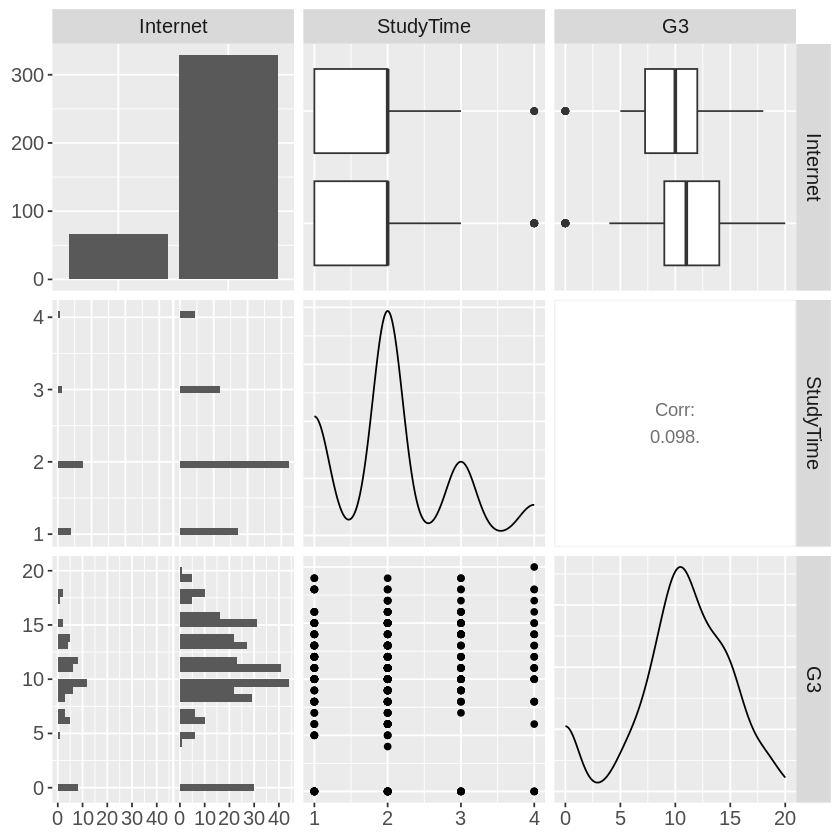

In [11]:
pair_plots <- data |>
    select(Internet, StudyTime, G3) |>
    ggpairs(progress = FALSE) +
    theme(
        text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )
pair_plots

**Interpretation**

There does not appear to be a significant relationship between study habits `StudyTime` and final grade `G3`.

However, it appears that there is a relationship between the access to internet `Internet` and final grade `G3`.

Next, we will use a more detailed box plot to explore this relationship.

#### Box Plots

We use a box plot to examine the relationship between internet access `Internet` and final grade `G3`.

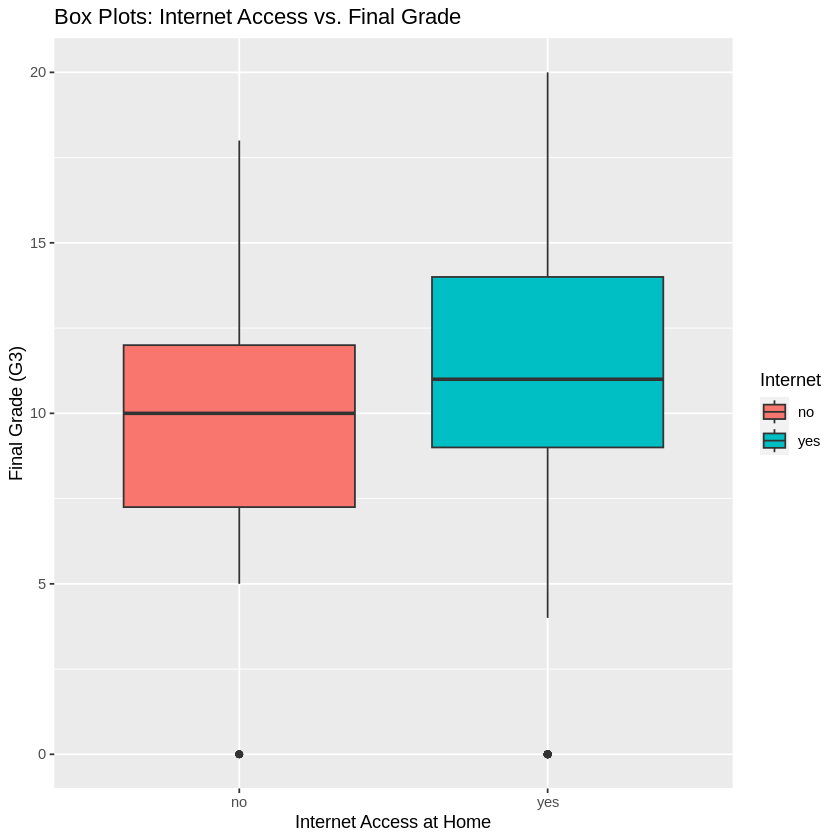

In [12]:
ggplot(data, aes(x = Internet, y = G3, fill = Internet)) +
    geom_boxplot() +
    labs(x = "Internet Access at Home", y = "Final Grade (G3)") +
    ggtitle("Box Plots: Internet Access vs. Final Grade")

**Interpretation**

1. **Central Tendency:** 
   - All three quartiles (lower, middle, upper) are slightly higher for the group with internet access compared to the group without internet access. This indicates that, on average, students with internet access have higher final grades across the board.
<br><br>
2. **Spread of Data:**
   - The lower whisker for the group with internet access is longer, this indicates that there is a wider range of lower final grades in the group with internet access compared to the group without internet access.
   - The upper whiskers are the same for both groups, this suggests that the upper range of final grades is similar for students with and without internet access. The highest final grades achieved by students in both groups are comparable.
<br><br>
3. **Outliers:**
   - Both groups have a dot for outliers at the same location (`0`) of the final grade, indicating that there are data points in both groups with exceptionally low final grades. This suggests that certain students from both groups face similar academic challenges, or perhaps they missed school due to extenuating circumstances.
   - The presence of outliers at the same location underscores that external factors, unrelated to internet access, may impact the academic performance of these students.

In summary, the box plot reveals that students with internet access, on average, perform better in terms of final grades, but there is more variation in lower grades within this group. It also highlights that both groups share similar academic challenges, as indicated by the presence of outliers with exceptionally low final grades.

#### Faceted Bar Chart (Categorical)

Next, we shall use faceted bar charts to examine the distribution of our numeric response variable `G3` (using the average), and how it varies across **categorical/factor** variables in order to identify trends, patterns, and differences in the data.

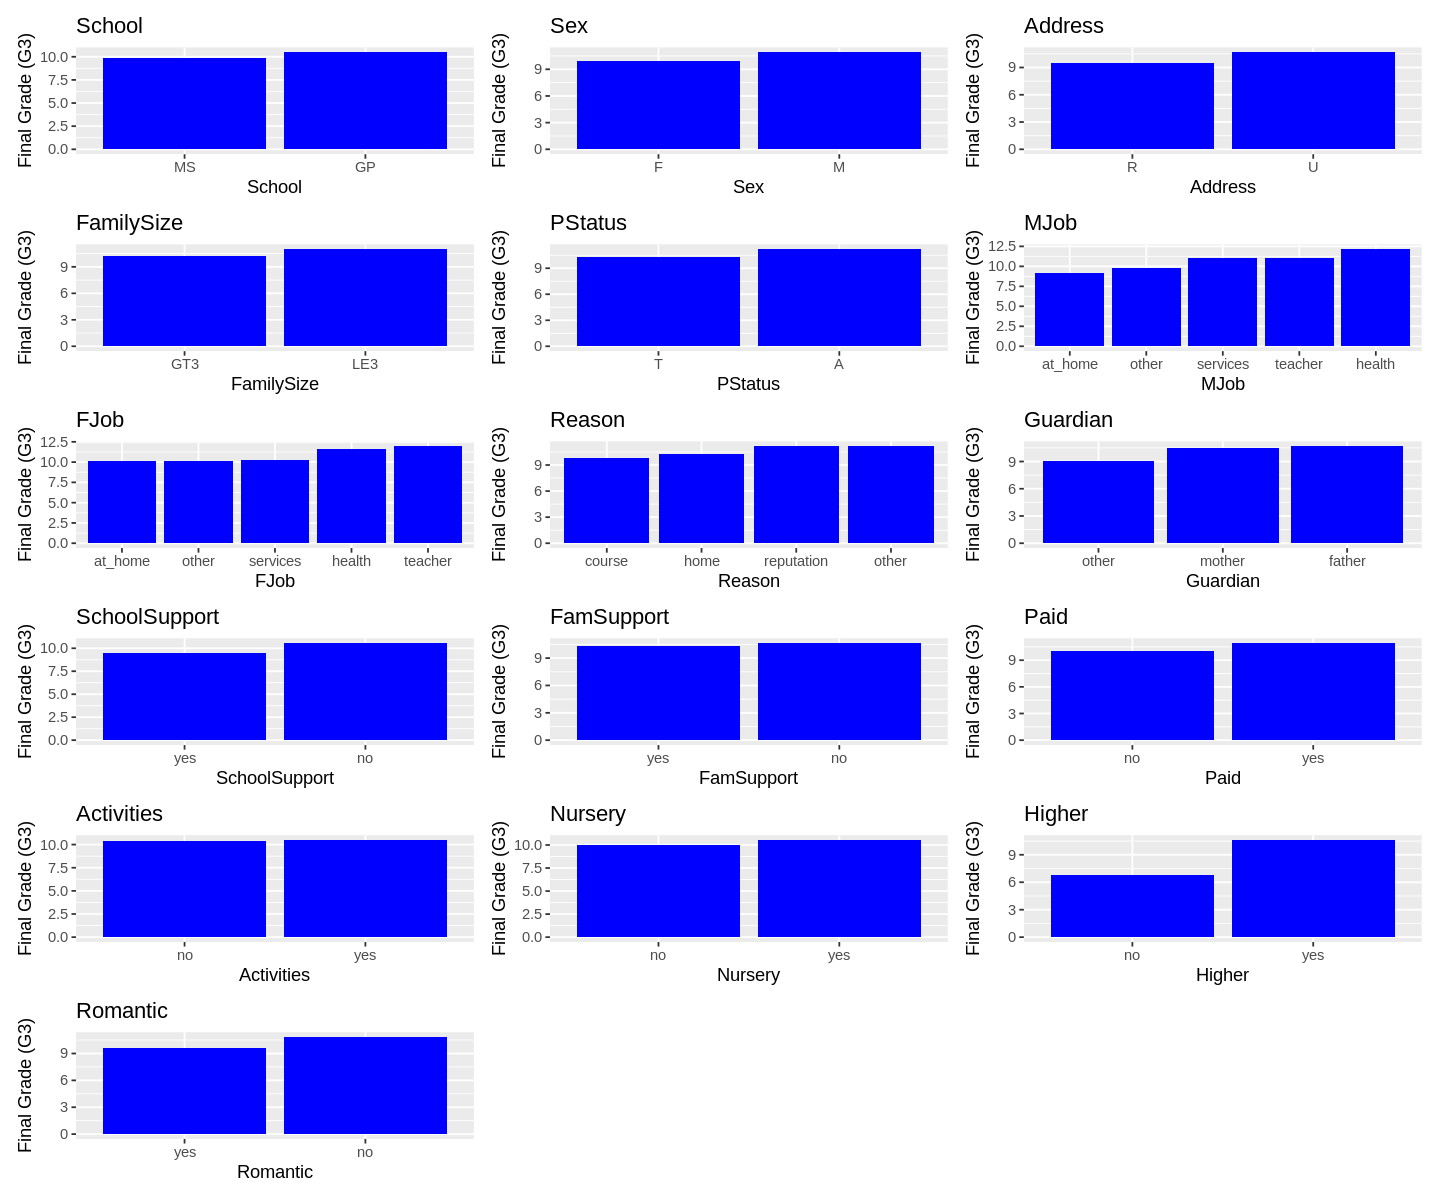

In [13]:
options(repr.plot.width=12, repr.plot.height=10)

#Remove Internet because already explored
data_factor_remaining <- data_factor |>
    select(-Internet)

# Define the variable names for faceting
facet_vars_factor <- colnames(data_factor_remaining)

# Create a list of ggplot objects for each facet
facetbar_factor <- lapply(facet_vars_factor, function(var) {
    average_data <- data |>
        group_by(.data[[var]]) |>
        summarize(avg_G3 = mean(G3, na.rm = TRUE)) |>
        arrange(desc(avg_G3)) |>
        mutate(!!var := reorder(.data[[var]], avg_G3)) #  Re-arrange the factor levels so that they are ordered by the values of avg_G3
    
    ggplot(average_data, aes(x = .data[[var]], y = avg_G3)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(x = var, y = "Final Grade (G3)") +
    ggtitle(var)
})

# Combine the plots
plot_facetbar_factor <- wrap_plots(facetbar_factor, ncol = 3)
plot_facetbar_factor


**Interpretation**

*On average*,

1. `School`: Those from the school Gabriel Pereira `GP` have a higher final grade.
2. `Sex`: Males `M` have a higher final grade.
3. `Address`: Those who live in urban parts `U`, have a higher final grade.
4. `FamilySize`: Those from family sizes less than 3 `LE3` have a higher final grade.
5. `PStatus`: Those with parents that live apart `A` have a higher final grade.
6. `MJob`: Those with fathers working in health care related jobs `health` have a higher final grade.
7. `FJob`: Those with mothers working in education `teacher` have a higher final grade.
8. `Reason`: Those that chose their school due to school reputation `reputation` and other reasons `other` have a higher final grade (comparable).
9. `Guardian`: Those whose guardian are their fathers `father` or mothers `mother` have a higher final grade than those with other types `other`.
10. `SchoolSupport`: Those without extra educational support `no` have a higher final grade.
11. `FamSupport`: Those without family educational support `no` have a higher final grade.
12. `Paid`: Those with extra paid classes within the course subject `yes` have a higher final grade.
13. `Activities`: Those who do `yes` an do not engage `no` in extra-curricular activities have no observable difference in final grades.
14. `Nursery`: Those that attended nursery school `yes` have a slightly higher final grade.
15. `Higher`: Those that want to take higher education `yes` have an observably higher final grade.
16. `Romantic`: Those with a romantic relationship `yes` have a lower final grade.

It's important to note that these observations are based on averages and may not necessarily imply causation. Further analysis and exploration are needed to understand the underlying reasons behind these patterns and differences in the dataset.


#### Faceted Bar Chart (Numerical)

Again, we shall use faceted bar charts to examine the distribution of our numeric response variable `G3` (using the average).

However, now we will observe how it varies across **numerical** variables in order to identify trends, patterns, and differences in the data.

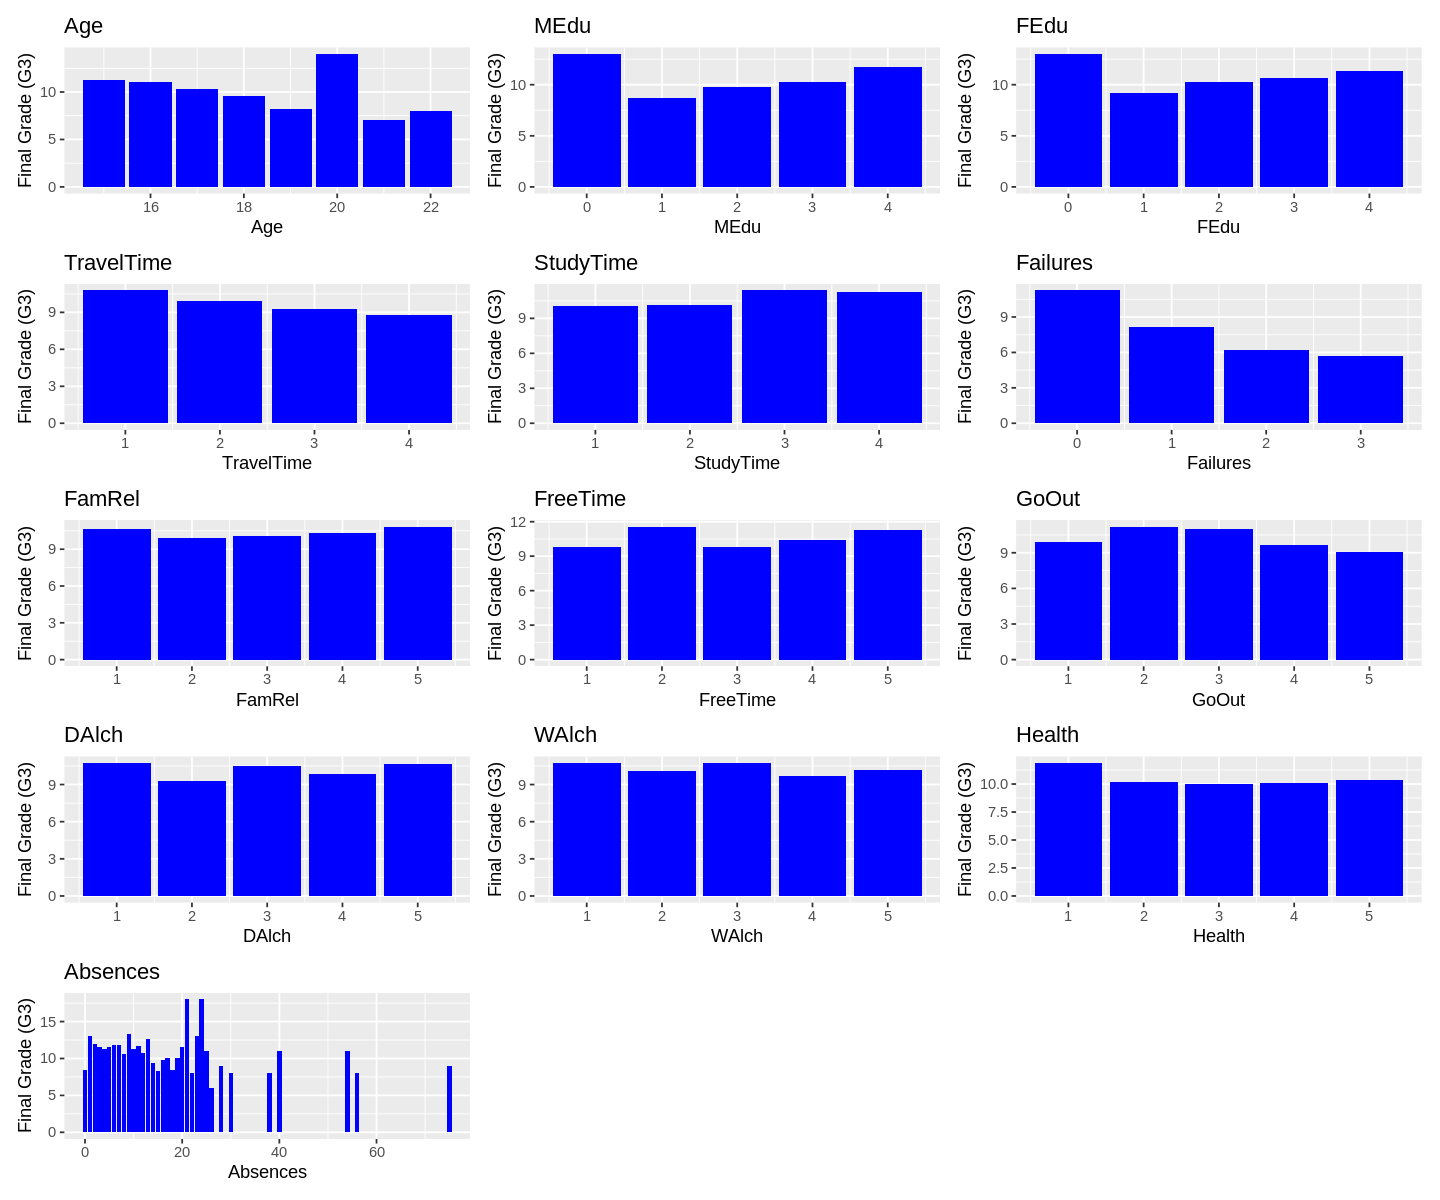

In [14]:
options(repr.plot.width=12, repr.plot.height=10)

data_numeric_dropG3 <- data_numeric |>
    select(-G3)

# Define the variable names for faceting
facet_vars_numeric <- colnames(data_numeric_dropG3)

# Create a list of ggplot objects for each facet
facetbar_numeric <- lapply(facet_vars_numeric, function(var) {
    average_data <- data |>
        group_by(.data[[var]]) |>
        summarize(avg_G3 = mean(G3, na.rm = TRUE))
    
    ggplot(average_data, aes(x = .data[[var]], y = avg_G3)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(x = var, y = "Final Grade (G3)") +
    ggtitle(var)
})

# Combine the plots
plot_facetbar_numeric <- wrap_plots(facetbar_numeric, ncol = 3)
plot_facetbar_numeric


**Interpretation**

*On average*,

1. `Age`: Those of age `20` have the highest final grade.
2. `MEdu`: Those whose mother's don't have higher education have the highest grade. However, as the mother's education increases, the students final grade increases.
3. `FEdu`: Same with father's education
4. `TravelTime`: As the home to school travel time increases, the final grade decreases.
5. `StudyTime`: As study time increases, final grade increases. However, once the study time is more than 10 hours, there is no observable increase.
6. `Failures`: As number of past class failures increase, the final grade decreases.
7. `FamRel`: Those with extremely high or extremely low quality of family relationships tend to have higher final grades.
8. `FreeTime`: There is no observable trend in regards to free time after school.
9. `GoOut`: Those that spend an extremely high or extremely low amount of time going out with friends tend to have lower final grades.
10. `DAlch`: There is no observable trend in regards to workday alchohol consumption.
11. `WAlch`: There is no observable trend in regards to weekend alchohol consumption.
12. `Health`: Those with very bad health status tend to have a higher final grade.
13. `Absences`: Those with aroound 20 absences tend to have the highest final grades.

Again, it's important to note that these observations are based on averages and may not necessarily imply causation. Further analysis and exploration are needed to understand the underlying reasons behind these patterns and differences in the dataset.


#### Correlation Plot

Here we are using a correlation plot to explore the relationship between the numerical variables.

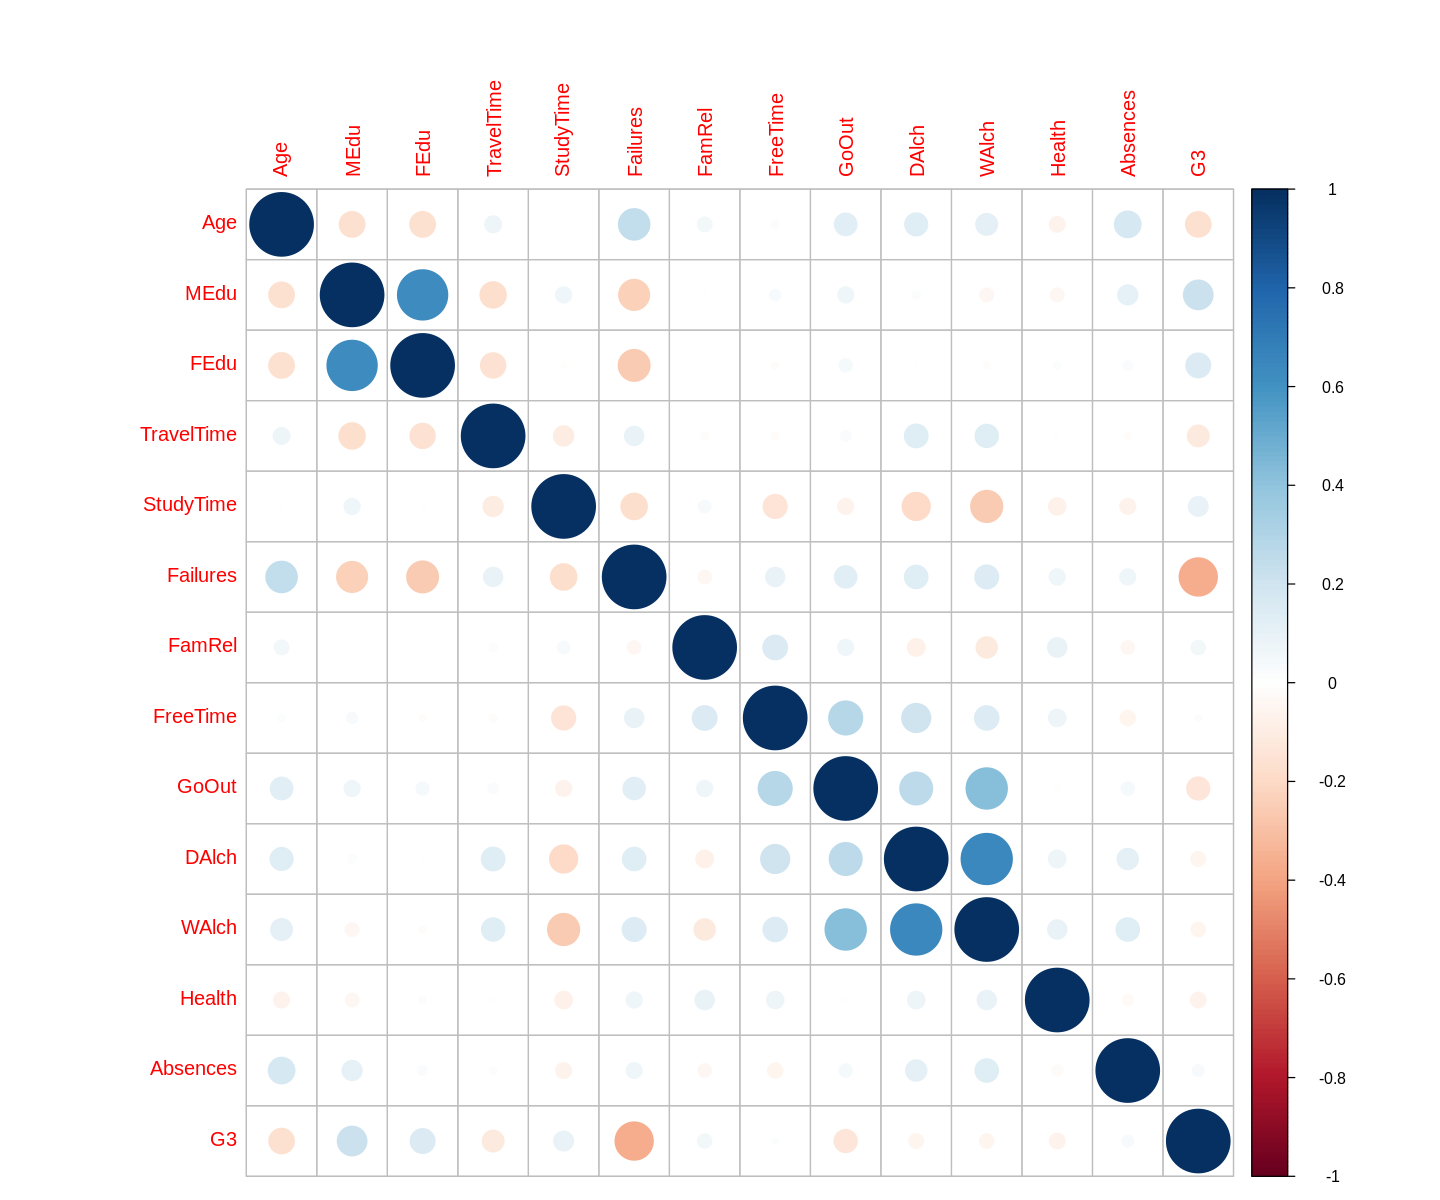

In [15]:
corrplot(cor(data_numeric))

Then, we pull out the top 10 (5 pairs) of features with the  strongest relationships.

In [16]:
# Calculate correlation matrix for numeric variables
cor_matrix <- cor(data_numeric)

# Convert the correlation matrix to a data frame for easier manipulation
cor_df <- as.data.frame(as.table(cor_matrix))
colnames(cor_df) <- c("Variable1", "Variable2", "Correlation")

# Remove diagonal entries (self-correlations)
cor_df <- cor_df[cor_df$Variable1 != cor_df$Variable2, ]

# Sort the correlations by absolute strength in descending order
cor_df <- cor_df[order(-abs(cor_df$Correlation)), ]

# Select the top 10 correlations
top_10_correlations <- head(cor_df, 10)

# Get the feature names for Variable1 and Variable2
feature_names1 <- names(data_numeric)[top_10_correlations$Variable1]
feature_names2 <- names(data_numeric)[top_10_correlations$Variable2]

# Display the top 10 correlations with feature names
for (i in 1:10) {
  cat(i, ": `", feature_names1[i], "` - `", feature_names2[i], "`\n")
  cat("strength: ", top_10_correlations$Correlation[i], "\n\n")
}


1 : ` WAlch ` - ` DAlch `
strength:  0.6475442 

2 : ` DAlch ` - ` WAlch `
strength:  0.6475442 

3 : ` FEdu ` - ` MEdu `
strength:  0.6234551 

4 : ` MEdu ` - ` FEdu `
strength:  0.6234551 

5 : ` WAlch ` - ` GoOut `
strength:  0.4203857 

6 : ` GoOut ` - ` WAlch `
strength:  0.4203857 

7 : ` G3 ` - ` Failures `
strength:  -0.3604149 

8 : ` Failures ` - ` G3 `
strength:  -0.3604149 

9 : ` GoOut ` - ` FreeTime `
strength:  0.2850187 

10 : ` FreeTime ` - ` GoOut `
strength:  0.2850187 



**Interpretation**

1. `WAlch` and `DAlch`: These variables have a very strong positive correlation of `0.6475442`.
    - This suggests that students who consume alcohol on weekdays (`WAlch`) tend to also consume alcohol on weekends (`DAlch`).<br><br>

2. `FEdu` and `MEdu`: There is a strong positive correlation of `0.6234551` between the mother's education (`FEdu`) and the father's education (`MEdu`).
    - This indicates that in families where one parent has a higher level of education, the other parent often has a higher level of education as well.<br><br>

3. `WAlch` and `GoOut`: These variables have a moderate positive correlation of `0.4203857`.
    - It implies that students who consume more alcohol on weekends (`WAlch`) tend to spend more time going out with friends (`GoOut`).<br><br>

4. `G3` and `Failures`: There is a significant negative correlation of `-0.3604149` between the final grade in mathematics (`G3`) and the number of past class failures (`Failures`).
    - This means that students with a higher number of past class failures tend to have lower final grades.<br><br>

5. `GoOut` and `FreeTime`: These variables exhibit a moderate positive correlation of `0.2850187`.
    - It suggests that students who spend more time going out with friends (`GoOut`) also tend to have more free time (`FreeTime`) after school.
    
It is essential to be mindful of the presence of **multicollinearity**, particularly in the cases of `DAlch` between `WAlch`, and `MEdu` between `FEdu`. Their strong positive correlation may result in difficulties when interpreting their individual impacts in regression models later on. We should consider addressing multicollinearity through variable selection to ensure the reliability and interpretability of our analysis later on. 

### Scatter Plots

Next, we will vsualize the relationship of the respones variable `G3` with each of the two explanatory variables `Absences` `WAlch` in two separate plots.

`geom_smooth()` using formula = 'y ~ x'


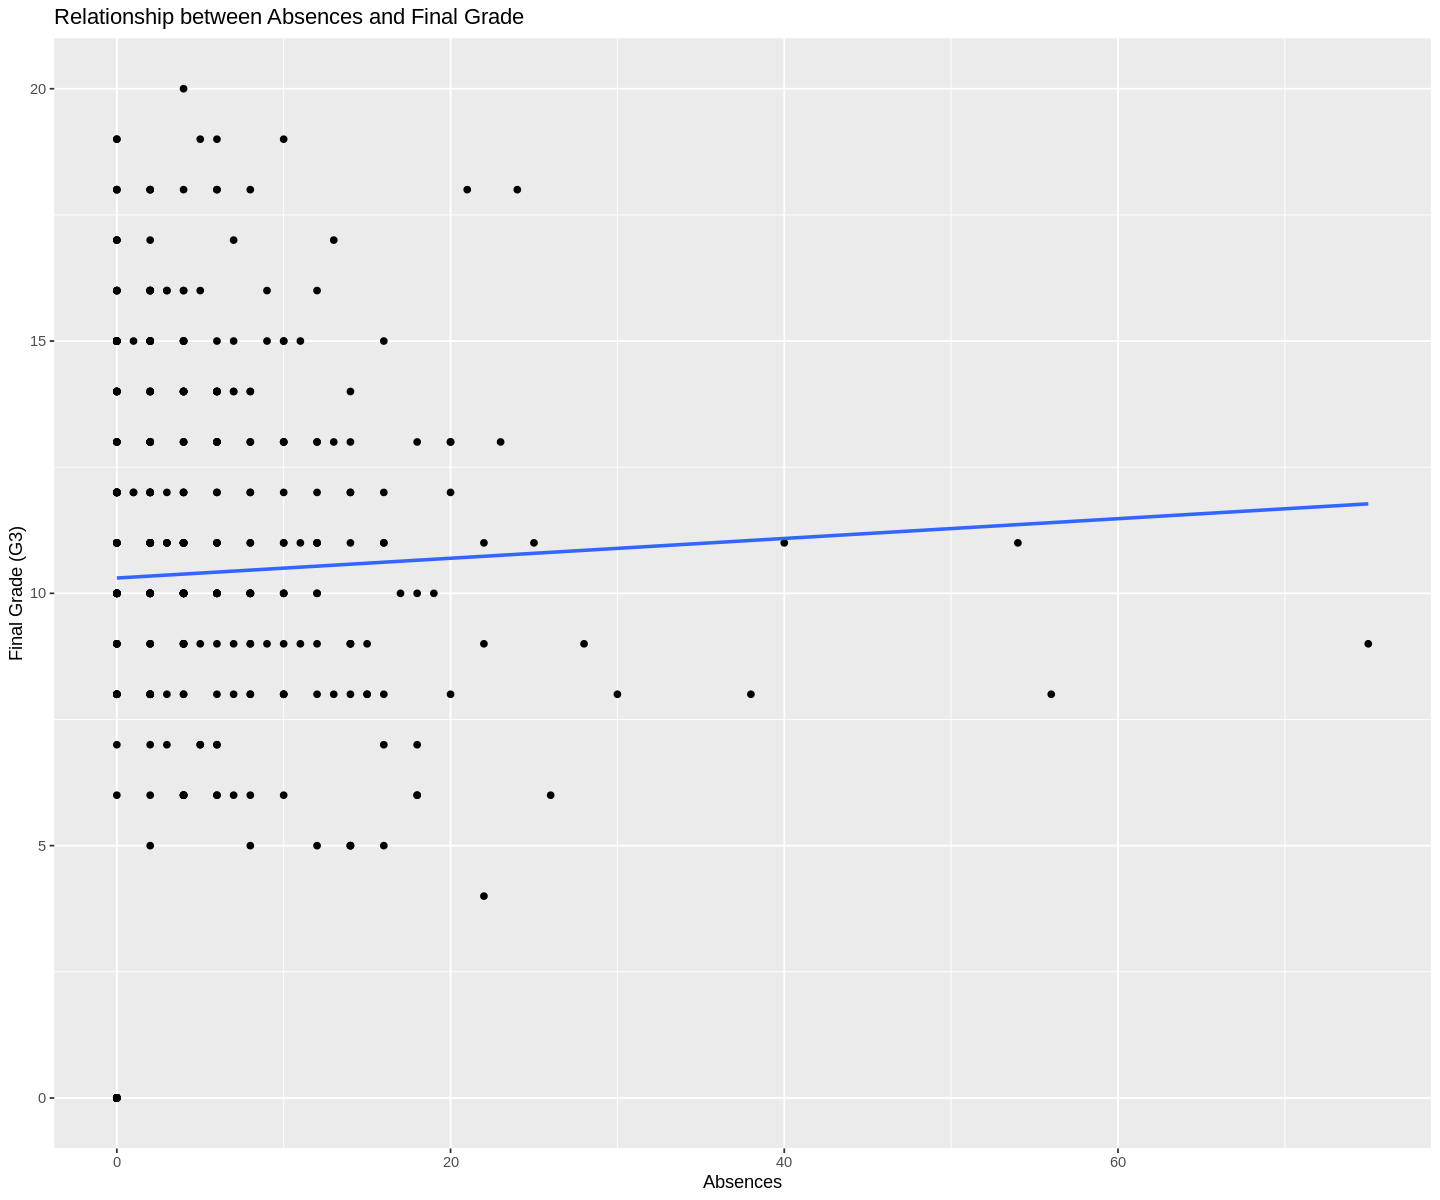

In [17]:
ggplot(data, aes(x = Absences, y = G3)) +
  geom_point() +
  labs(x = "Absences", y = "Final Grade (G3)", 
       title = "Relationship between Absences and Final Grade") +
  geom_smooth(method = "lm", se = FALSE)


**Interpretation**

As the number of absences increases, there is a noticeable trend of final grades decreasing, indicating a small positive correlation between these two variables. The scatter plot reveals a sloping trendline, suggesting that as students accumulate more absences, their final grades tend to be lower.

`geom_smooth()` using formula = 'y ~ x'


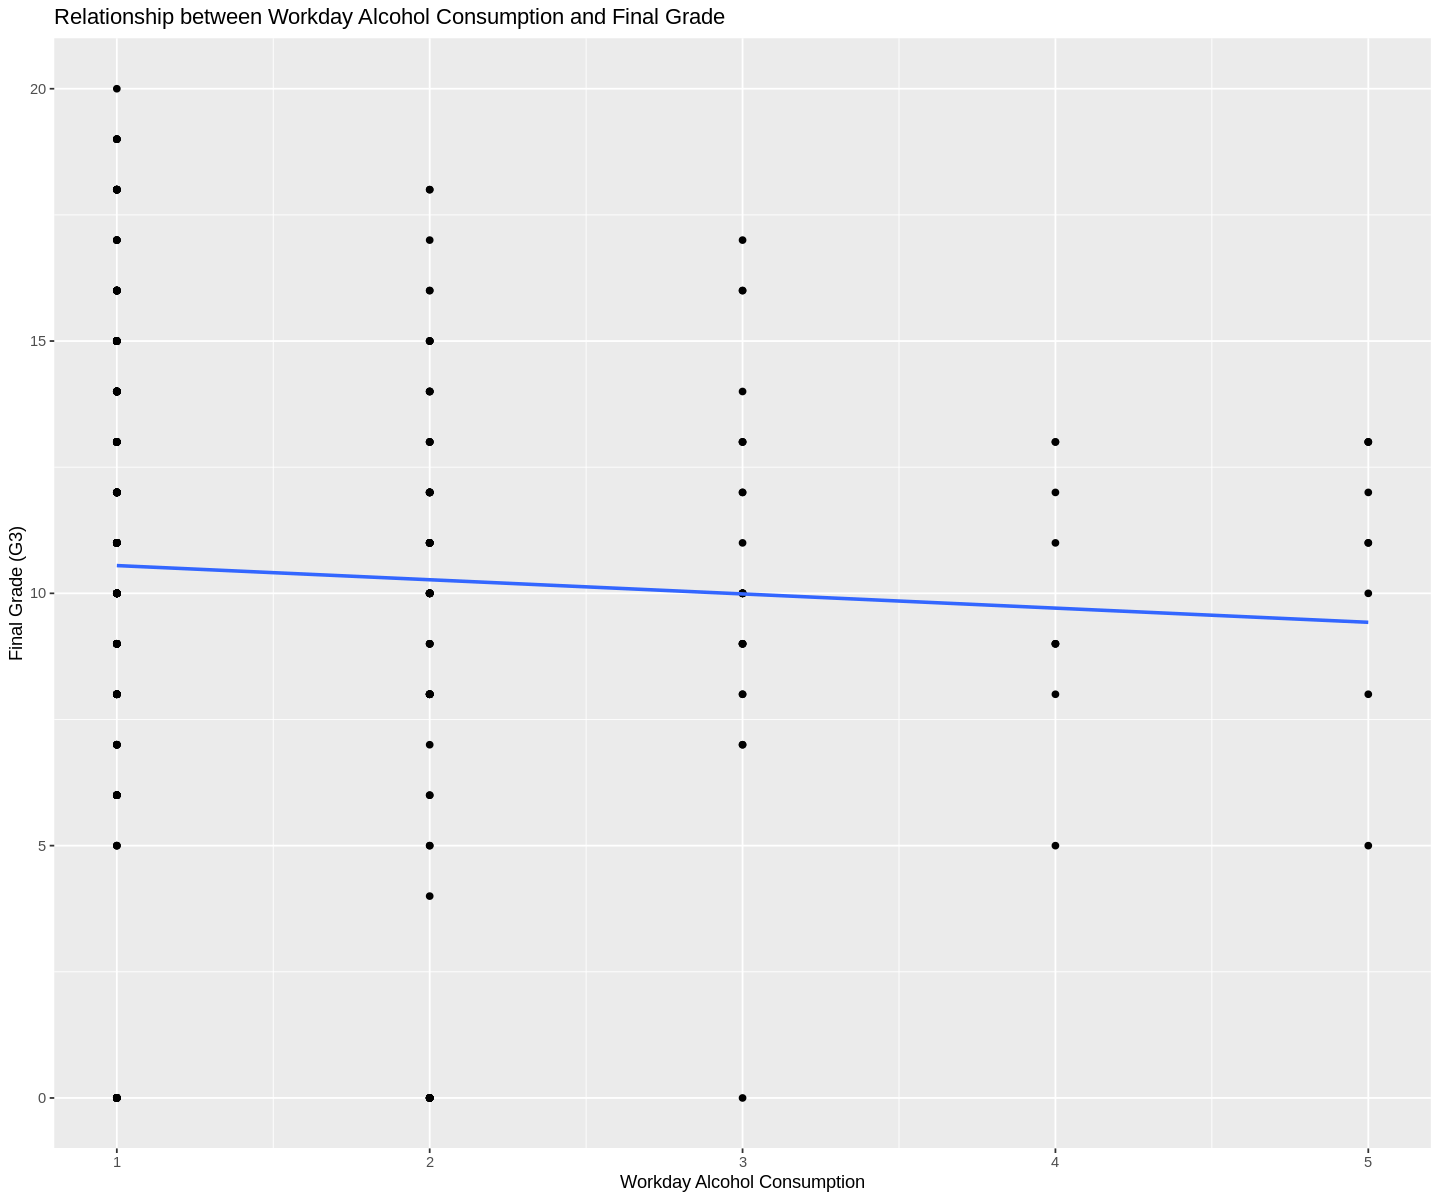

In [18]:
ggplot(data, aes(x = DAlch, y = G3)) +
  geom_point() +
  labs(x = "Workday Alcohol Consumption", y = "Final Grade (G3)", 
       title = "Relationship between Workday Alcohol Consumption and Final Grade") +
  geom_smooth(method = "lm", se = FALSE)

**Interpretation**

As the level of workday alcohol consumption increases, there is a clear downward slope in the final grades, indicating a small negative correlation between these two variables. This suggests that higher workday alcohol consumption is associated with slightly lower final grades.

### Final Visualization

After we've yse multiple visualizations to explore the dataset, we will now decide which visualization is most relevent to address the question.

First, we find the factor variables that have more than three unique levels.

This is because using factor variables with too many levels in multiple linear regression can lead to problems such as high dimensionality, overfitting, and reduced model interpretability. These factors can make the model complex, computationally intensive, and violate key regression assumptions.

In [19]:
# Filter for factors with more than 3 levels
factors_with_more_than_3_levels <- ulst[sapply(ulst, function(x) length(x) > 3)]

# List the factor variables with more than 3 levels
names(factors_with_more_than_3_levels)

[1] "MJob"   "FJob"   "Reason"

Next, we create a new dataset `data_reduced` that does not include the factors with more than 3 levels.

In [20]:
data_reduced <- data |>
    select(-MJob, FJob, Reason)

head(data_reduced, 3)

School Sex Age Address FamilySize PStatus MEdu FEdu FJob    Reason ⋯ Internet
1 GP     F   18  U       GT3        A       4    4    teacher course ⋯ no      
2 GP     F   17  U       GT3        T       1    1    other   course ⋯ yes     
3 GP     F   15  U       LE3        T       1    1    other   other  ⋯ yes     
  Romantic FamRel FreeTime GoOut DAlch WAlch Health Absences G3
1 no       4      3        4     1     1     3       6        6
2 no       5      3        3     1     1     3       4        6
3 no       4      3        2     2     3     3      10       10

From the reduced dataset, we pick the following variables that we find most important for the prediction, according to the EDA and interpretations conducted earlier.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

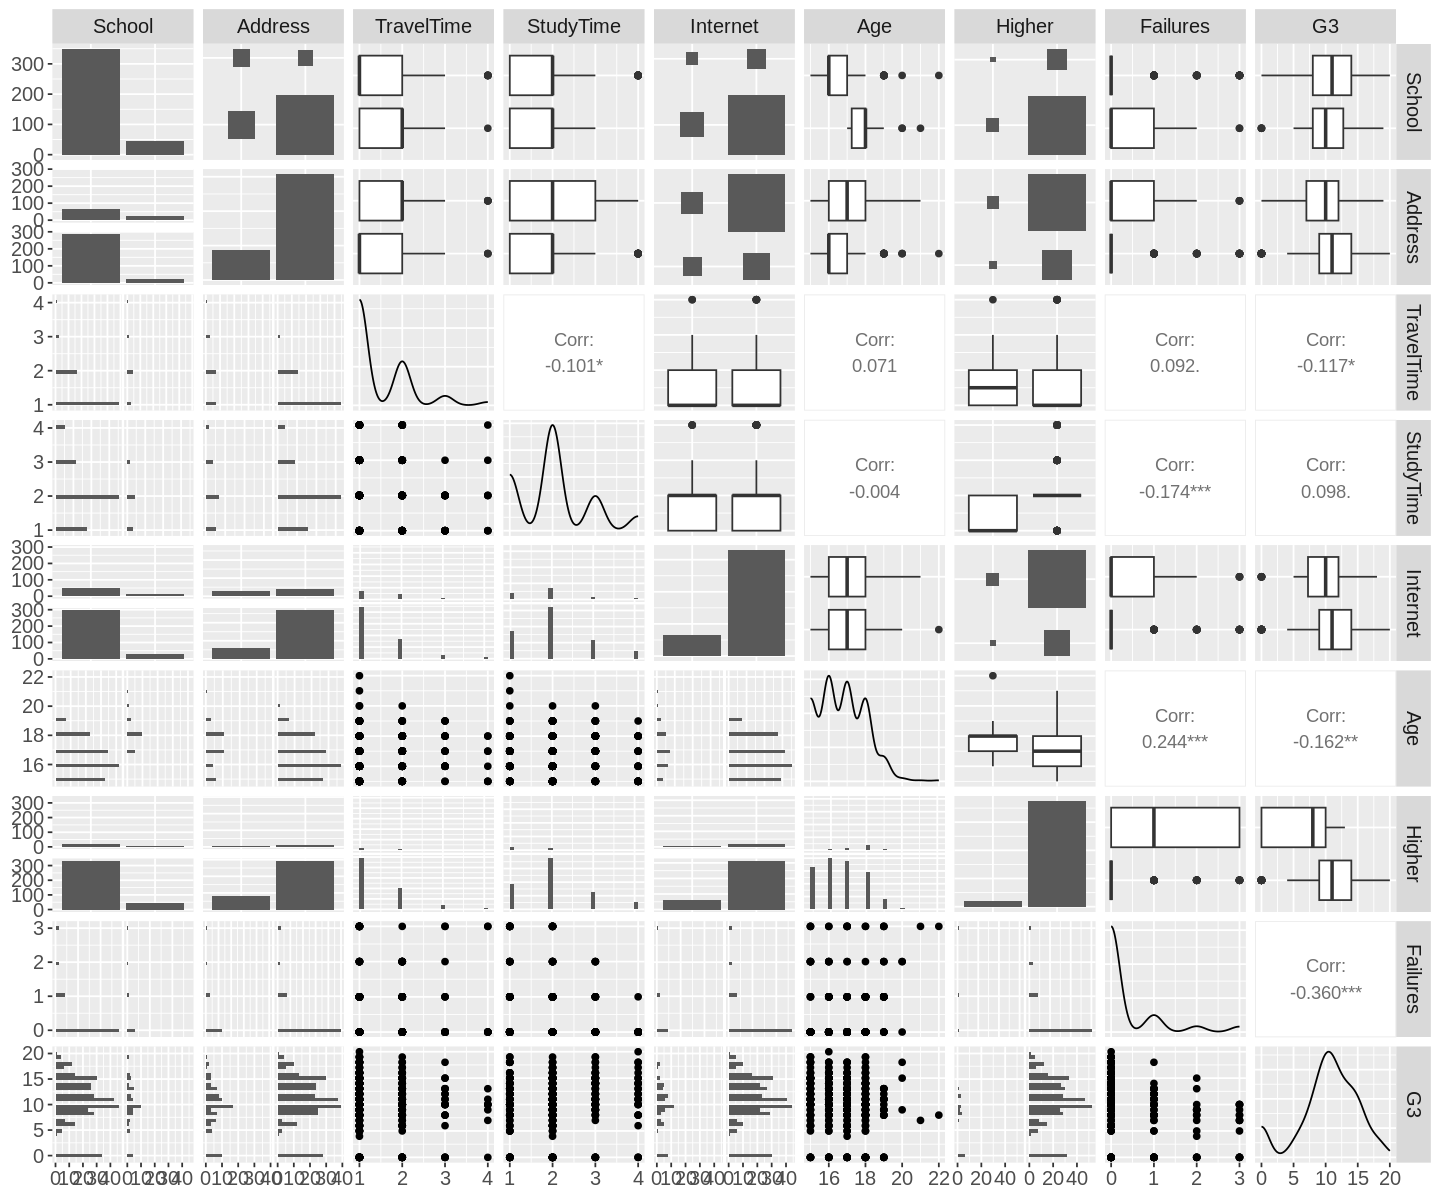

In [22]:
pair_plots <- data_reduced |>
    select(School, Address, TravelTime, StudyTime, Internet, Age, Higher, Failures, G3) |>
    ggpairs(progress = FALSE) +
    theme(
        text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )
pair_plots

The pair plot generated above includes the variables `School` `Address` `TravelTime` `StudyTime` `Internet` `Age` `Higher` `Failures` `G3` for exploratory data analysis. Each of these variables serves a specific purpose in understanding the dataset and addressing the research question related to predicting students' final grades based on family background and study habits. 

A pair plot was selected for the following reasons:

1. **Identifying Relationships**: It allows us to visually assess the relationships between numeric/factor variables in the dataset. By examining scatterplots, we can quickly identify whether there are any linear associations or patterns between variables.

2. **Grouping Insights**: It can help us discern potential groups or clusters in the data. For example, if certain variables exhibit strong correlations and groups of data points tend to cluster together, it may suggest the presence of distinct subpopulations within the dataset.

3. **Outlier Detection**: Pair plots can help identify potential outliers or anomalies, we can find them as the data points that deviate from the general patterns in the scatterplots.

4. **Variable Selection**: When working on predictive modeling later on, the pair plot can assist in selecting relevant predictors by visualizing their relationships with the target variable `G3`. This can guide feature selection for model building.

5. **Multicollinearity Detection**: Pair plots can reveal multicollinearity issues by showcasing strong linear relationships between predictor variables, which can be a concern in regression modeling later on.

Explanation for the selection of these variables:

1. **School (Categorical/Factor)**: The choice of school can have a significant impact on a student's education. It's essential to explore how students' final grades differ between the two schools, Gabriel Pereira `GP` and Mousinho da Silveira `MS`. School selection could be indicative of various factors, such as teaching quality and resources, that may influence academic performance.

2. **Address (Categorical/Factor)**: The type of address, whether urban `U` or rural `R`, can affect a student's living environment and access to resources. It's relevant to investigate how living in an urban or rural area relates to students' final grades, as it may influence study habits and educational opportunities.

3. **TravelTime (Numeric)**: The time it takes for students to travel from home to school can impact their daily routines. It's important to explore how travel time affects final grades, as longer commutes might reduce available study time and energy for academics.

4. **StudyTime (Numeric)**: The amount of time a student dedicates to studying on a weekly basis is a key factor in academic success. We include this variable to understand the relationship between study time and final grades. It helps in assessing the influence of study habits on academic performance.

5. **Internet (Categorical/Factor)**: Represents whether a student has internet access at home. This variable is relevant because it is one of the explanatory variables (independent variables) under consideration in the research question. It's important to explore how internet access relates to students' final grades, as it can impact study habits and academic performance.

6. **Age (Numeric)**: The age of the students. Age can be a significant factor in understanding students' academic performance. It's chosen to explore whether there's any relationship between students' ages and their final grades.

7. **Higher (Categorical/Factor)**: Whether a student aspires to pursue higher education (`yes` or `no`) is an important career aspiration variable. It's relevant to explore how this aspiration influences students' final grades, as those aiming for higher education might exhibit different study habits and motivation levels.

8. **Failures (Numeric)**: Indicates the number of past class failures. This variable is another crucial explanatory variable. It's relevant to explore how a history of past class failures may influence a student's final grade in mathematics.

9. **G3 (Numeric)**: Represents the final grade in mathematics, which is the response variable (dependent variable) in the research question. It's included to examine how the final grade relates to the other variables, particularly the explanatory variables, to identify potential predictors.

These variables were selected because they represent a mix of categorical and numeric factors that are relevant to the research question. They encompass various aspects of a student's background and behavior that may impact their final grades in mathematics. Investigating these variables collectively provides a holistic view of potential influences on academic performance. The pair plot displays scatterplots and histograms for these variables, allowing us to visualize the relationships, distribution patterns, and potential outliers. It helps in assessing the associations between the explanatory variables and the response variable, identifying any clusters or groups, and detecting potential issues such as multicollinearity. This visualization aids in the initial exploration of the data and serves as a foundation for further analysis and model building in the project.

**Potential Challenges**

As mentioned earlier, we should be cautious about multicollinearity, which arises when dummy variables are highly correlated, potentially causing issues in the model's interpretability and leading to unstable coefficient estimates.

To avoid multicollinearity, we need to carefully choose reference categories and exclude one level to prevent perfect multicollinearity, as well as consider model complexity and implications for interpretation.

**Groups in the Observations**

??TODO

ASK TA
- hard time figuring out final viz
- groups in the observations?
- what did prof mean about be careful about heatmaps?
- remove bin message?